                               --------- Overview ----------

The dataset summarizes about potential frauds taking in medicare insurance.
The total Medicare spending increased exponentially due to frauds in Medicare claims. Some of the most common types of frauds by providers are:. Duplicate submission of a claim for the same service. Misrepresenting the service provided. Charging for a more complex or expensive service than was actually provided.
We would see a big data use case to see how pyspark can help in our analysis and as well as assists to provide ML computation to predict the fraud cases.

Dataset- (https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis)

In [2]:
#Installing pyspark
!pip install pyspark

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 198 kB 52.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=584424a2ee7eaa3235c9f7df077a36172897d65357568758ddc165e34d3676ef
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [1]:
# Import pyspark and host the spark Session
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [2]:
# Cleaning our data to preprocess and analyse the same
def read(path):
  file_type = "csv"
  file_location = path
  # CSV options
  infer_schema = "true"
  first_row_is_header = "true"
  delimiter = ","
  df = spark.read.format(file_type) \
    .option("inferSchema", infer_schema) \
    .option("header", first_row_is_header) \
    .option("sep", delimiter) \
    .option('nanValue', ' ')\
    .option('nullValue', ' ')\
    .load(file_location)
  df.show()

In [ ]:
df_1=read("/content/Beneficiarydata-1542865627584.csv")
df_2=read('/content/Inpatientdata-1542865627584.csv')
df_3=read('/content/Outpatientdata-1542865627584.csv')
df_4=read('/content/1542865627584.csv')

+---------+----------+----------+------+----+---------------------+-----+------+-------------------+-------------------+---------------------+------------------------+-------------------------+------------------+--------------------------+----------------------+--------------------+-------------------------+------------------------+-------------------------------+------------------+------------------------+---------------------+------------------------+---------------------+
|   BeneID|       DOB|       DOD|Gender|Race|RenalDiseaseIndicator|State|County|NoOfMonths_PartACov|NoOfMonths_PartBCov|ChronicCond_Alzheimer|ChronicCond_Heartfailure|ChronicCond_KidneyDisease|ChronicCond_Cancer|ChronicCond_ObstrPulmonary|ChronicCond_Depression|ChronicCond_Diabetes|ChronicCond_IschemicHeart|ChronicCond_Osteoporasis|ChronicCond_rheumatoidarthritis|ChronicCond_stroke|IPAnnualReimbursementAmt|IPAnnualDeductibleAmt|OPAnnualReimbursementAmt|OPAnnualDeductibleAmt|
+---------+----------+----------+------+

In [3]:
# Storing the values of dataframe to the variables for our use
from pyspark.sql.functions import *
import pyspark
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
df_1= spark.read.format("csv").option("header","true").load('/content/1542865627584.csv')
df_2= spark.read.format("csv").option("header","true").load('/content/1542865627584.csv')
df_3= spark.read.format("csv").option("header","true").load("/content/1542865627584.csv")
df_4= spark.read.format("csv").option("header","true").load('/content1542865627584.csv')

Joining our data according to the requirement. The dataset is widely divided into different parts and we intent to use the comman attributes and perform the appropriate joins accordingly.

In [4]:
# Applying the join to BeneId ie the policy id.
data_1=df_1.join(df_2,df_1.BeneID ==  df_2.BeneID,"inner")

In [5]:
# Inner join to provider ie the company where insurance is being granted.
data_2=data_1.join(df_4,data_1.Provider == df_4.Provider,"inner")

In [6]:
data=data_2.join(df_3,['Provider'])

In [7]:
# Finally we drop the irrelevant coloumns as they dont play a vital role in our analysis.
data=data.drop('DOD','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6','DeductibleAmtPaid','ClmAdmitDiagnosisCode','OperatingPhysician','OtherPhysician','AttendingPhysician','OperatingPhysician','OtherPhysician','BeneID')

In [ ]:
# The no. of fraud cases status
data.groupBy('PotentialFraud').count().show()

+--------------+-------+
|PotentialFraud|  count|
+--------------+-------+
|            No|1866601|
|           Yes|9140503|
+--------------+-------+



In [ ]:
# Stats for Reimbursement amounts
data.select('IPAnnualReimbursementAmt').describe().show()

+-------+------------------------+
|summary|IPAnnualReimbursementAmt|
+-------+------------------------+
|  count|                11007104|
|   mean|      17536.803453478773|
| stddev|      17617.014149701627|
|    min|                       0|
|    max|                    9980|
+-------+------------------------+



 ~ $17500 claims/reimbursements of insurance in average was done by the customers  

In [ ]:
data.show()

+--------+----------+------+----+---------------------+-----+------+-------------------+-------------------+---------------------+------------------------+-------------------------+------------------+--------------------------+----------------------+--------------------+-------------------------+------------------------+-------------------------------+------------------+------------------------+---------------------+------------------------+---------------------+--------+------------+----------+----------------------+-----------+-----------+------------------+--------+--------------+---------+------------+----------+----------------------+
|Provider|       DOB|Gender|Race|RenalDiseaseIndicator|State|County|NoOfMonths_PartACov|NoOfMonths_PartBCov|ChronicCond_Alzheimer|ChronicCond_Heartfailure|ChronicCond_KidneyDisease|ChronicCond_Cancer|ChronicCond_ObstrPulmonary|ChronicCond_Depression|ChronicCond_Diabetes|ChronicCond_IschemicHeart|ChronicCond_Osteoporasis|ChronicCond_rheumatoidarthriti

In [ ]:
### Alternate way- Converting pyspark to Pandas to assit us in the EDA

In [8]:
# Convert the spark dataset to pandas
df_1=df_1.toPandas()
df_2=df_2.toPandas()
df_3=df_3.toPandas()
df_4=df_4.toPandas()

In [9]:
# Applying the logic for joins.
data_1=df_1.merge(df_2, how='inner', on='BeneID')
data_2=data_1.merge(df_4, how='inner', on='Provider')
data_df=data_2.merge(df_3,how='inner',on='Provider')
data_df=data_df[data_df!='NaN']

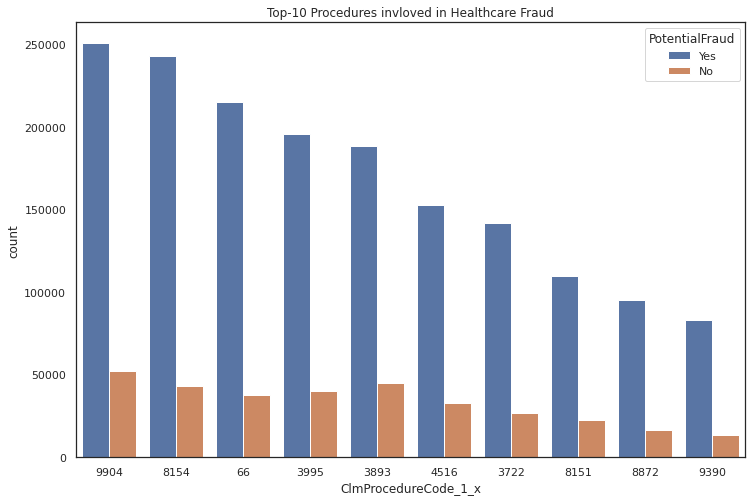

<Figure size 864x576 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8)},style='white')
ax=sns.countplot(x='ClmProcedureCode_1_x',hue='PotentialFraud',data=data_df
              ,order=data_df.ClmProcedureCode_1_x.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')

We see that procedure 9904 and 8154 had the highest amount of fraud cases.

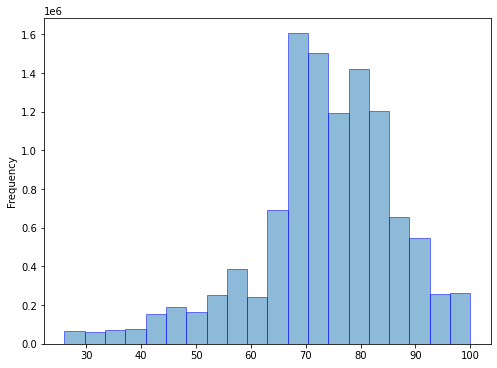

In [ ]:
# Distribution for fradulent age range.
import pandas as pd
import matplotlib.pyplot as plt
data_df['DOB'] =  pd.to_datetime(data_df['DOB'], format='%Y-%m-%d')  
now = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
data_df['DOB'] = data_df['DOB'].where(data_df['DOB'] < now) 
data_df['age'] = (now - data_df['DOB']).astype('<m8[Y]')  
ax = data_df['age'].plt.hist(bins=20, alpha=0.5, figsize=(8, 6), edgecolor='b')
plt.title("Age Distribution for Fraudelent cases")

Most of the fradulent cases observed were for people having an age>65.

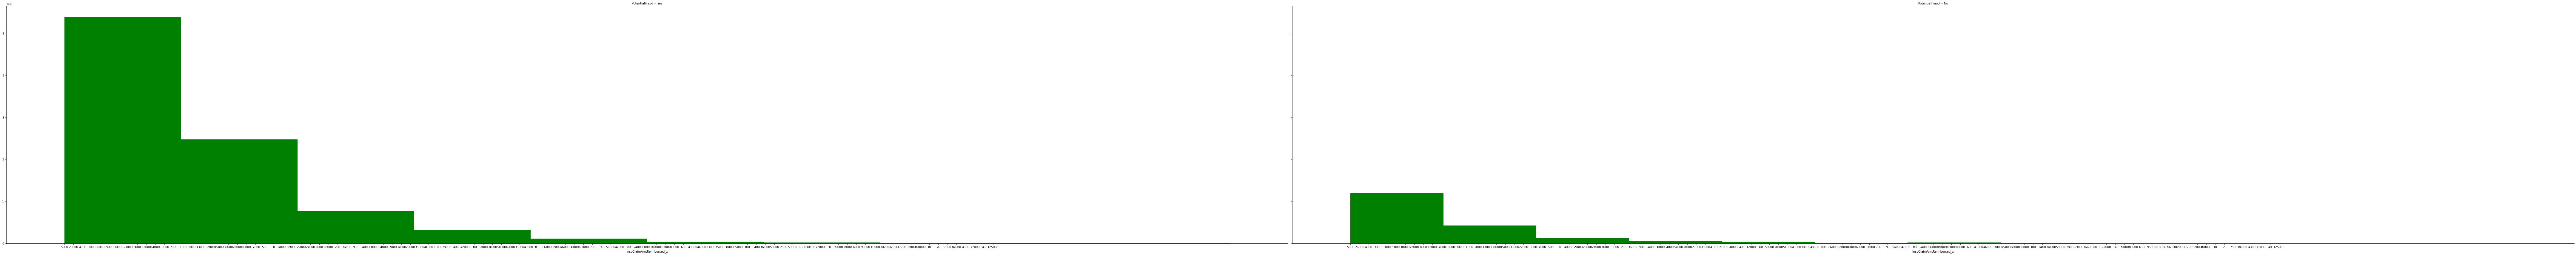

In [18]:
# Were checking the skewness for Claims filed.
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data_df, col='PotentialFraud', height=12, aspect=5)
g.map(plt.hist, 'InscClaimAmtReimbursed_x', bins=10, color = 'g')

The skewness for reimbursements is a right skewed in its distribution.

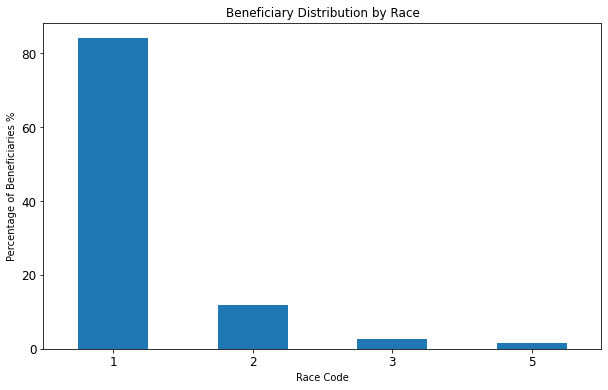

In [ ]:
#Plotting the frequencies of race-wise beneficiaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
count_Race = pd.value_counts(data_df['Race'], sort = True)
(count_Race*100/len(data_df)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)
#Giving titles and labels to the plot
plt.yticks(np.arange(0,100,20))
plt.title("Beneficiary Distribution by Race")
plt.xlabel("Race Code")
plt.ylabel("Percentage of Beneficiaries "'%')
plt.show()

It seems that more than 80% beneficiaries are of same race which is Race 1 which means Maximum population in the dataset originated from same race.There is no race 4 in the dataset

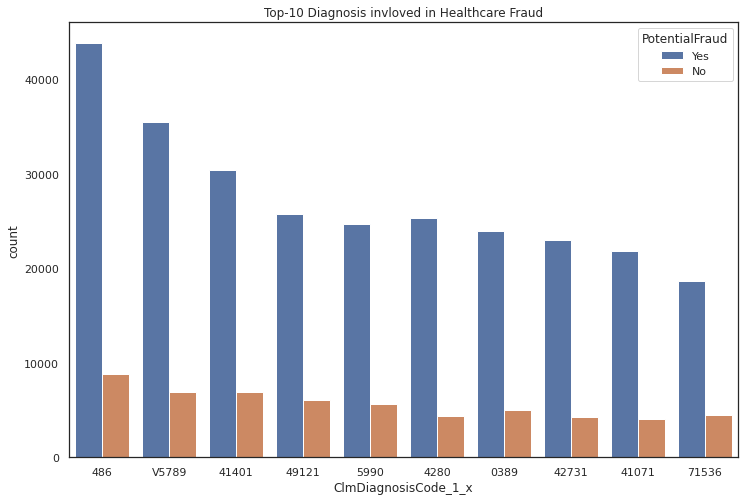

In [ ]:
#Top-10 Claim Diagnosis invloved in Healthcare Fraud
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='ClmDiagnosisCode_1_x',hue='PotentialFraud',data=data_df
              ,order=data_df.ClmDiagnosisCode_1_x.value_counts().iloc[:10].index)
plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.show()

In [10]:
data=data.limit(10000)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           10000 non-null  object
 1   Race                             10000 non-null  object
 2   RenalDiseaseIndicator            10000 non-null  object
 3   State                            10000 non-null  object
 4   County                           10000 non-null  object
 5   NoOfMonths_PartACov              10000 non-null  object
 6   NoOfMonths_PartBCov              10000 non-null  object
 7   ChronicCond_Alzheimer            10000 non-null  object
 8   ChronicCond_Heartfailure         10000 non-null  object
 9   ChronicCond_KidneyDisease        10000 non-null  object
 10  ChronicCond_Cancer               10000 non-null  object
 11  ChronicCond_ObstrPulmonary       10000 non-null  object
 12  ChronicCond_Depression           

In [13]:
data=data.drop('Provider','DOB','IPAnnualReimbursementAmt','InscClaimAmtReimbursed','ClaimID','ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt','DiagnosisGroupCode')

In [14]:
# We are converting our dataframe to pandas for the sake of dtype conversion
d=data.toPandas()

In [15]:
d.head()

,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,3204,60,70,No
1,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,3204,60,70,No
2,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,3204,60,70,No
3,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,3204,60,70,No
4,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,3204,60,70,No


In [16]:
# Convert the required dtypes to int, this process is required to do vector transformation
d['Gender']=  d['Gender'].astype(int)
d['Race'] = d['Race'].astype(int)
d["State"] = d["State"].astype(int)
d['County'] = d["County"].astype(int)
d['NoOfMonths_PartACov'] =d["NoOfMonths_PartACov"].astype(int)
d['NoOfMonths_PartBCov'] = d["NoOfMonths_PartBCov"].astype(int)
d['ChronicCond_Alzheimer'] =d["ChronicCond_Alzheimer"].astype(int)
d["ChronicCond_Heartfailure"] = d["ChronicCond_Heartfailure"].astype(int)
d["ChronicCond_KidneyDisease"] = d["ChronicCond_KidneyDisease"].astype(int)
d['ChronicCond_Cancer'] = d["ChronicCond_Cancer"].astype(int)
d["ChronicCond_ObstrPulmonary"] = d["ChronicCond_ObstrPulmonary"].astype(int)
d['ChronicCond_Depression'] = d["ChronicCond_Depression"].astype(int)
d["ChronicCond_Diabetes"] = d["ChronicCond_Diabetes"].astype(int)
d["ChronicCond_IschemicHeart"] = d["ChronicCond_IschemicHeart"].astype(int)
d["ChronicCond_Osteoporasis"] = d["ChronicCond_Osteoporasis"].astype(int)
d["ChronicCond_rheumatoidarthritis"] = d["ChronicCond_rheumatoidarthritis"].astype(int)
d["ChronicCond_stroke"] = d["ChronicCond_stroke"].astype(int)
d['IPAnnualDeductibleAmt'] = d["IPAnnualDeductibleAmt"].astype(int)
d["OPAnnualReimbursementAmt"] = d["OPAnnualReimbursementAmt"].astype(int)
d["OPAnnualDeductibleAmt"] = d["OPAnnualDeductibleAmt"].astype(int)
d['PotentialFraud']=d['PotentialFraud'].map({'No':0,'Yes':1})
d['PotentialFraud']=d['PotentialFraud'].astype(int)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Provider                         10000 non-null  object
 1   DOB                              10000 non-null  object
 2   Gender                           10000 non-null  int64 
 3   Race                             10000 non-null  int64 
 4   RenalDiseaseIndicator            10000 non-null  object
 5   State                            10000 non-null  int64 
 6   County                           10000 non-null  int64 
 7   NoOfMonths_PartACov              10000 non-null  int64 
 8   NoOfMonths_PartBCov              10000 non-null  int64 
 9   ChronicCond_Alzheimer            10000 non-null  int64 
 10  ChronicCond_Heartfailure         10000 non-null  int64 
 11  ChronicCond_KidneyDisease        10000 non-null  int64 
 12  ChronicCond_Cancer               

In [17]:
# We now would convert our dataframe to spark in order to apply ML Lib.
sparkDF=spark.createDataFrame(d)

In [ ]:
sparkDF.printSchema()

root
 |-- Gender: long (nullable = true)
 |-- Race: long (nullable = true)
 |-- RenalDiseaseIndicator: string (nullable = true)
 |-- State: long (nullable = true)
 |-- County: long (nullable = true)
 |-- NoOfMonths_PartACov: long (nullable = true)
 |-- NoOfMonths_PartBCov: long (nullable = true)
 |-- ChronicCond_Alzheimer: long (nullable = true)
 |-- ChronicCond_Heartfailure: string (nullable = true)
 |-- ChronicCond_KidneyDisease: string (nullable = true)
 |-- ChronicCond_Cancer: string (nullable = true)
 |-- ChronicCond_ObstrPulmonary: string (nullable = true)
 |-- ChronicCond_Depression: string (nullable = true)
 |-- ChronicCond_Diabetes: string (nullable = true)
 |-- ChronicCond_IschemicHeart: string (nullable = true)
 |-- ChronicCond_Osteoporasis: string (nullable = true)
 |-- ChronicCond_rheumatoidarthritis: string (nullable = true)
 |-- ChronicCond_stroke: string (nullable = true)
 |-- IPAnnualDeductibleAmt: string (nullable = true)
 |-- OPAnnualReimbursementAmt: string (nullabl

In [18]:
# Applying vector assembler to the input features
from pyspark.ml.feature import VectorAssembler
vector_assembler = VectorAssembler(inputCols=['Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer','ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'],outputCol="features")
df_temp = vector_assembler.transform(sparkDF)

In [19]:
# Using a decision tree algorithm to predict the cases for fraud.
from pyspark.ml.classification import DecisionTreeClassifier
(train,test) = df_temp.randomSplit([0.8,0.2],seed=12345)
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'PotentialFraud',impurity='gini',minInfoGain= 0.0)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('PotentialFraud').show(10)

+--------------+
|PotentialFraud|
+--------------+
|             1|
|             1|
|             1|
|             1|
|             1|
|             1|
|             1|
|             1|
|             1|
|             1|
+--------------+
only showing top 10 rows



In [20]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="PotentialFraud", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))
print("Accuracy = %g " % accuracy)

Test Error = 0.0662351 
Accuracy = 0.933765 


Conclusion-
We do see a no of frauds that has taken place in regard to different diagnosis and claims as well as we see a uncomman age range
being targeted for the same. In context to what we understand is to have a well informed and a capability to have some decision
support in order to understand how frauds can be tackled.
If a firm for instance has a history of piled up data, being inclined to a big data requirement, we have pyspark to assist in the computational feasibilty of it and we see how addition of MLlib provides a decisional based support to predict the fraud cases.